In [10]:

import numpy as np # матрицы, векторы (линейная алгебра) 
import pandas as pd # работа с табличными данными 
import statsmodels.formula.api as smf 
# работа с регрессиями 
import seaborn as sns # построение графиков 
#2.1
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv') #создаем переменную с помощью пандас, которая будет брать данные из талицы 
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


<AxesSubplot:xlabel='age', ylabel='sleep'>

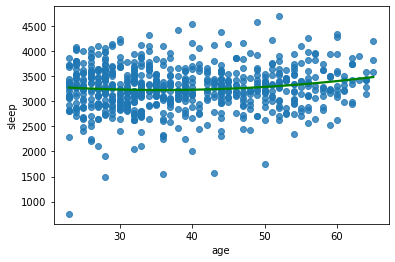

In [19]:
#номер 2.1.2 
sns.regplot(data=df, x='age', order=2, y='sleep', ci=None, line_kws={"color": "g"})

In [6]:
# подгонка прямой
fitted_line = smf.ols(formula='sleep~age', data=df).fit() #регрессия чего от чего строится
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept    3128.91
age             3.54
dtype: float64

In [7]:
# подгонка прямой
fitted_line = smf.ols(formula='sleep~-1+age', data=df).fit() #регрессия чего от чего строится
# коэффициенты с округлением
fitted_line.params.round(2)

age    77.82
dtype: float64

<AxesSubplot:xlabel='sleep', ylabel='totwrk'>

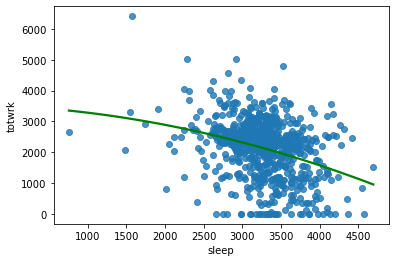

In [24]:
# задача 2.1.3
sns.regplot(data=df, x='sleep', order=2, y='totwrk', ci=None, line_kws={"color": "g"})

In [25]:
fitted_polynom = smf.ols(formula='sleep~totwrk+I(totwrk**2)', data=df).fit()
fitted_polynom.params.round(2)

Intercept         3523.59
totwrk              -0.07
I(totwrk ** 2)      -0.00
dtype: float64

<AxesSubplot:xlabel='age', ylabel='totwrk'>

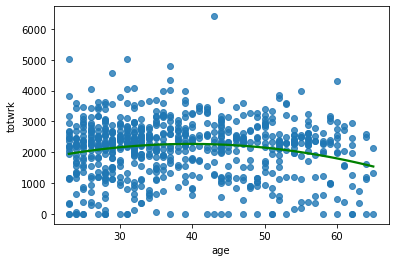

In [26]:
# задача 2.1.4
sns.regplot(data=df, x='age', order=2, y='totwrk', ci=None, line_kws={"color": "g"})

In [27]:
fitted_polynom = smf.ols(formula='sleep~age+I(age**2)', data=df).fit()
fitted_polynom.params.round(2)

Intercept      3608.03
age             -21.49
I(age ** 2)       0.30
dtype: float64

In [30]:
# Задача 2.1.5
# подгонка плоскости
fitted_plane = smf.ols(formula='sleep~totwrk+age', data=df).fit()
# коэффициенты с округлением
fitted_plane.params.round(2)

Intercept    3469.20
totwrk         -0.15
age             2.92
dtype: float64

In [11]:
#2.2
ee = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/Labour.csv')
ee


,capital,labour,output,wage
0,2.606563,184,9.250759,43.080307
1,1.323237,91,3.664310,27.780016
2,22.093692,426,28.781516,44.467748
3,10.737851,72,4.124642,39.734710
4,1.161365,46,2.890150,34.650709
...,...,...,...,...
564,2.625403,20,1.424376,33.477545
565,1.276386,61,2.109048,26.300732
566,1.953869,117,6.241870,41.153979
567,1.318527,46,7.902237,66.720139


Intercept    6.19
capital      0.74
dtype: float64

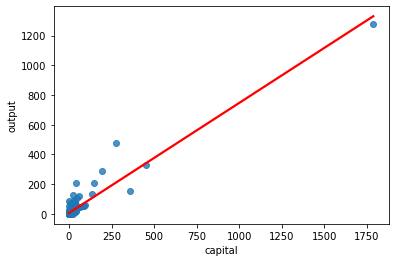

In [48]:
#Задача 2.1.1
sns.regplot(data=ee, x='capital', y='output', ci=None, line_kws={"color": "r"})
# подгонка прямой
fitted_line = smf.ols(formula='output~capital', data=ee).fit() #регрессия чего от чего строится
# коэффициенты с округлением
fitted_line.params.round(2)

In [49]:
fitted_line = smf.ols(formula='output~-1+capital', data=ee).fit() #регрессия чего от чего строится
# коэффициенты с округлением
fitted_line.params.round(2)

capital    0.75
dtype: float64

Intercept          1.19
np.log(capital)    0.56
dtype: float64

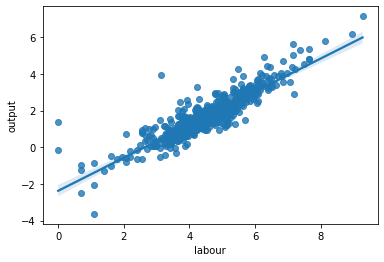

In [56]:
sns.regplot(data=ee, x=np.log(ee['labour']), y=np.log(ee['output']))
# подгонка прямой
fitted_line = smf.ols(formula='np.log(output)~np.log(capital)', data=ee).fit() #регрессия чего от чего строится
# коэффициенты с округлением
fitted_line.params.round(2)

np.log(capital)    0.88
dtype: float64

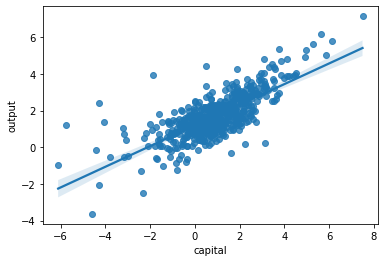

In [59]:

sns.regplot(data=ee, x=np.log(ee['capital']), y=np.log(ee['output']))
# подгонка прямой
fitted_line = smf.ols(formula='np.log(output)~-1+np.log(capital)', data=ee).fit() #регрессия чего от чего строится
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept   -4.72
labour       0.10
dtype: float64

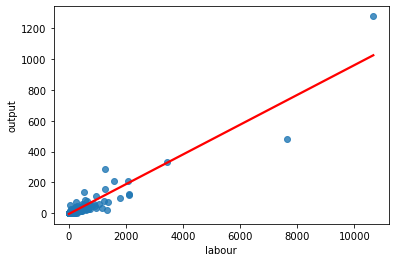

In [12]:
# Задача 2.2.2
sns.regplot(data=ee, x='labour', y='output', ci=None, line_kws={"color": "r"})
# подгонка прямой
fitted_line = smf.ols(formula='output~labour', data=ee).fit() #регрессия чего от чего строится
# коэффициенты с округлением
fitted_line.params.round(2)

labour    0.09
dtype: float64

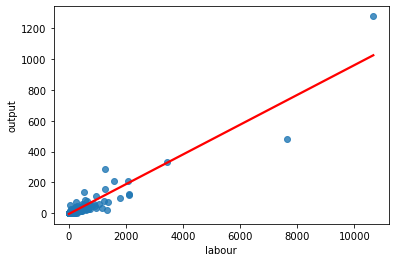

In [58]:
sns.regplot(data=ee, x='labour', y='output', ci=None, line_kws={"color": "r"})
# подгонка прямой
fitted_line = smf.ols(formula='output~-1+labour', data=ee).fit() #регрессия чего от чего строится
# коэффициенты с округлением
fitted_line.params.round(2)

Intercept        -2.38
np.log(labour)    0.90
dtype: float64

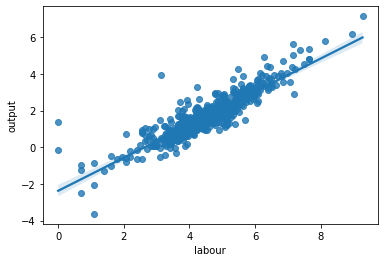

In [60]:
sns.regplot(data=ee, x=np.log(ee['labour']), y=np.log(ee['output']))
# подгонка прямой
fitted_line = smf.ols(formula='np.log(output)~np.log(labour)', data=ee).fit() #регрессия чего от чего строится
# коэффициенты с округлением
fitted_line.params.round(2)

np.log(labour)    0.41
dtype: float64

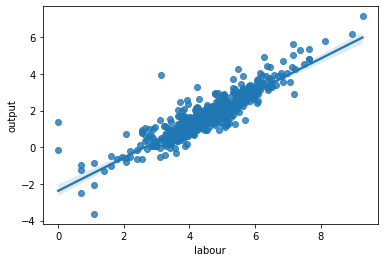

In [61]:
sns.regplot(data=ee, x=np.log(ee['labour']), y=np.log(ee['output']))
# подгонка прямой
fitted_line = smf.ols(formula='np.log(output)~-1+np.log(labour)', data=ee).fit() #регрессия чего от чего строится
# коэффициенты с округлением
fitted_line.params.round(2)

<AxesSubplot:xlabel='capital', ylabel='output'>

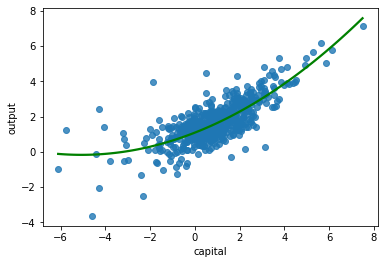

In [62]:
# Задача 2.2.4
sns.regplot(x=np.log(ee['capital']), order=2, y=np.log(ee['output']), ci=None, line_kws={"color": "g"})

In [64]:
fitted_polynom = smf.ols(formula='np.log(output)~np.log(capital)+I(np.log(capital)**2)', data=ee).fit()
fitted_polynom.params.round(2)

Intercept                  1.09
np.log(capital)            0.50
I(np.log(capital) ** 2)    0.05
dtype: float64

<AxesSubplot:xlabel='labour', ylabel='output'>

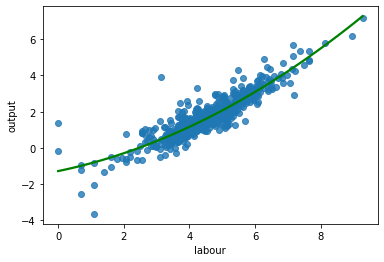

In [13]:
sns.regplot(x=np.log(ee['labour']), order=2, y=np.log(ee['output']), ci=None, line_kws={"color": "g"})

In [ ]:
fitted_polynom = smf.ols(formula='np.log(output)~np.log(capital)+I(np.log(capital)**2)', data=ee).fit()
fitted_polynom.params.round(2)